In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [109]:
experimental_results = pd.read_csv('data.csv')
experimental_results.head()

,time,Biomass,Nitrate,pc
0,0,149.9800,1210.7000,0.0000
1,1,223.6554,1171.4407,8.7803
2,2,298.4280,1132.6208,17.3638
3,3,374.2174,1094.2403,25.7505
4,4,450.9432,1056.2992,33.9404


In [110]:
# Define the system of ODEs
def kinetics_model(y, t, mu_max, K_s, Y, k):
    N, X, pc = y
    dNdt = -1/Y * (mu_max * N / (K_s + N)) * X
    dXdt = mu_max * N / (K_s + N) * X
    dpcdt = k * X
    return [dNdt, dXdt, dpcdt]


In [111]:
N0 = experimental_results['Nitrate'][0]
X0 = experimental_results['Biomass'][0]
pc0 = experimental_results['pc'][0]

y0 = [N0, X0, pc0]
y0

[1210.7, 149.98, 0.0]

In [112]:
t = np.linspace(experimental_results['time'].min(), experimental_results['time'].max(), len(experimental_results['time']))
t

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53.])

In [113]:
t_exp = np.array(experimental_results['time'])
data_exp = np.array(experimental_results[['Nitrate', 'Biomass', 'pc']]).flatten()

In [114]:
data_exp

array([1210.7   ,  149.98  ,    0.    , 1171.4407,  223.6554,    8.7803,
       1132.6208,  298.428 ,   17.3638, 1094.2403,  374.2174,   25.7505,
       1056.2992,  450.9432,   33.9404, 1018.7975,  528.525 ,   41.9335,
        981.7352,  606.8824,   49.7298,  945.1123,  685.935 ,   57.3293,
        908.9288,  765.6024,   64.732 ,  873.1847,  845.8042,   71.9379,
        837.88  ,  926.46  ,   78.947 ,  803.0147, 1007.4894,   85.7593,
        768.5888, 1088.812 ,   92.3748,  734.6023, 1170.3474,   98.7935,
        701.0552, 1252.0152,  105.0154,  667.9475, 1333.735 ,  111.0405,
        635.2792, 1415.4264,  116.8688,  603.0503, 1497.009 ,  122.5003,
        571.2608, 1578.4024,  127.935 ,  539.9107, 1659.5262,  133.1729,
        509.    , 1740.3   ,  138.214 ,  478.5287, 1820.6434,  143.0583,
        448.4968, 1900.476 ,  147.7058,  418.9043, 1979.7174,  152.1565,
        389.7512, 2058.2872,  156.4104,  361.0375, 2136.105 ,  160.4675,
        332.7632, 2213.0904,  164.3278,  304.9283, 

In [115]:
t_exp

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53], dtype=int64)

In [116]:
# Define a function that solves the ODEs and flattens the result
def solve_odes_flat(t, mu_max, K_s, Y, k):
    sol = odeint(kinetics_model, y0, t, args=(mu_max, K_s, Y, k))
    return sol.flatten()

In [117]:
# Fit the model
popt, pcov = curve_fit(solve_odes_flat, t_exp, data_exp)

In [118]:
# Extract fitted parameters
mu_max_fit, K_s_fit, Y_fit, k_fit = popt

In [119]:
mu_max_fit, K_s_fit, Y_fit, k_fit

(67492.86616339514,
 555747609.3416772,
 2.6477888602136463,
 0.0026731283022293287)

In [120]:
# Use the fitted parameters to solve the ODEs
y_fit = odeint(kinetics_model, y0, t_exp, args=(mu_max_fit, K_s_fit, Y_fit, k_fit))

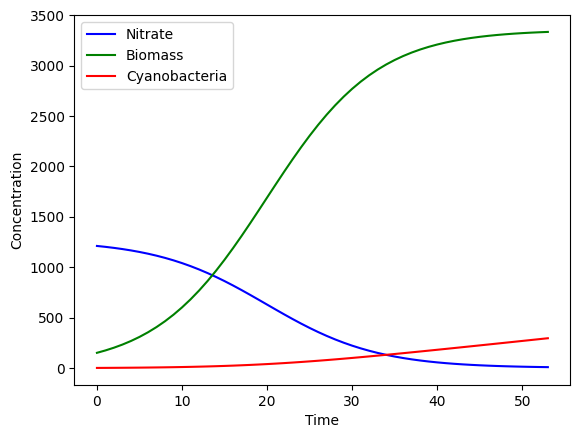

In [14]:
# Plot the results
plt.plot(t_exp, y_fit[:, 0], 'b-', label='Nitrate')
plt.plot(t_exp, y_fit[:, 1], 'g-', label='Biomass')
plt.plot(t_exp, y_fit[:, 2], 'r-', label='Cyanobacteria')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.show()

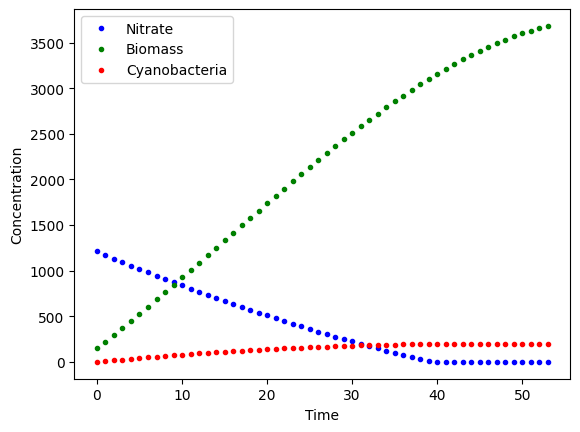

In [15]:
# Plot the experimental data
plt.plot(t_exp, data_exp[0::3], 'b.', label='Nitrate')
plt.plot(t_exp, data_exp[1::3], 'g.', label='Biomass')
plt.plot(t_exp, data_exp[2::3], 'r.', label='Cyanobacteria')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.show()

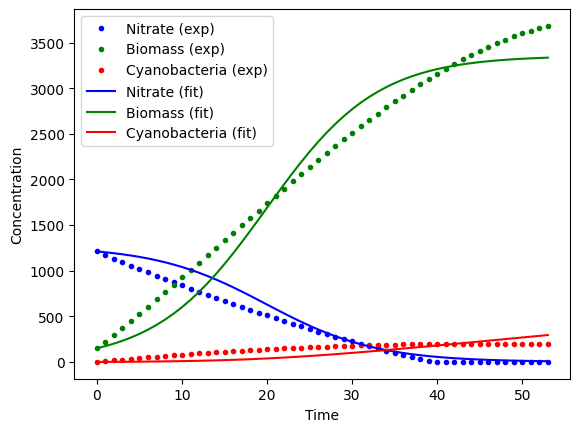

In [16]:
# plot the experimental data an the fitted model together
plt.plot(t_exp, data_exp[0::3], 'b.', label='Nitrate (exp)')
plt.plot(t_exp, data_exp[1::3], 'g.', label='Biomass (exp)')
plt.plot(t_exp, data_exp[2::3], 'r.', label='Cyanobacteria (exp)')
plt.plot(t_exp, y_fit[:, 0], 'b-', label='Nitrate (fit)')
plt.plot(t_exp, y_fit[:, 1], 'g-', label='Biomass (fit)')
plt.plot(t_exp, y_fit[:, 2], 'r-', label='Cyanobacteria (fit)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.show()

In [17]:
# Use the fitted parameters to solve the ODEs
y_fit = odeint(kinetics_model, y0, t_exp, args=(mu_max_fit, K_s_fit, Y_fit, k_fit))
y_fit


array([[1.21070000e+03, 1.49980000e+02, 0.00000000e+00],
       [1.20176286e+03, 1.73643649e+02, 4.31810836e-01],
       [1.19150397e+03, 2.00807039e+02, 9.31460930e-01],
       [1.17975722e+03, 2.31909957e+02, 1.50888618e+00],
       [1.16634524e+03, 2.67422037e+02, 2.17523911e+00],
       [1.15108190e+03, 3.07836147e+02, 2.94296051e+00],
       [1.13377604e+03, 3.53658407e+02, 3.82582903e+00],
       [1.11423679e+03, 4.05394200e+02, 4.83897884e+00],
       [1.09228055e+03, 4.63529697e+02, 5.99887405e+00],
       [1.06773972e+03, 5.28508640e+02, 7.32322736e+00],
       [1.04047322e+03, 6.00704568e+02, 8.83085047e+00],
       [1.01037843e+03, 6.80389232e+02, 1.05414249e+01],
       [9.77403947e+02, 7.67698691e+02, 1.24751849e+01],
       [9.41562430e+02, 8.62599460e+02, 1.46525093e+01],
       [9.02942134e+02, 9.64857851e+02, 1.70934257e+01],
       [8.61715873e+02, 1.07401628e+03, 1.98170423e+01],
       [8.18145815e+02, 1.18938060e+03, 2.28409292e+01],
       [7.72582800e+02, 1.31002

### PINN with known ODE constants

In [18]:
# Function to compute physics loss
def physics_loss(model, t, mu_max, K_s, Y, k):
    y_pred = model(t)
    N_pred, X_pred, pc_pred = y_pred[:, 0], y_pred[:, 1], y_pred[:, 2]
    
    # Compute derivatives
    dNdt_pred = torch.autograd.grad(N_pred, t, grad_outputs=torch.ones_like(N_pred), create_graph=True)[0]
    dXdt_pred = torch.autograd.grad(X_pred, t, grad_outputs=torch.ones_like(X_pred), create_graph=True)[0]
    dpcdt_pred = torch.autograd.grad(pc_pred, t, grad_outputs=torch.ones_like(pc_pred), create_graph=True)[0]
    
    # Physics equations
    eq1 = dNdt_pred + (1/Y) * (mu_max * N_pred / (K_s + N_pred)) * X_pred
    eq2 = dXdt_pred - mu_max * N_pred / (K_s + N_pred) * X_pred
    eq3 = dpcdt_pred - k * X_pred
    
    return torch.mean(eq1**2) + torch.mean(eq2**2) + torch.mean(eq3**2)

In [19]:
# Define a simple feedforward neural network
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.fc1 = nn.Linear(1, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 3)

    def forward(self, t):
        x = torch.sin(self.fc1(t))
        x = torch.sin(self.fc2(x))
        return self.fc3(x)

In [82]:
# t_exp
t_exp = t_exp[0:30] 
t_exp

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)

In [83]:
t_exp_tensor = torch.tensor(t_exp, dtype=torch.float32, requires_grad=True).reshape(-1, 1)
t_exp_tensor

tensor([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.]], grad_fn=<ViewBackward0>)

In [84]:
data_exp

array([1210.7   ,  149.98  ,    0.    , 1171.4407,  223.6554,    8.7803,
       1132.6208,  298.428 ,   17.3638, 1094.2403,  374.2174,   25.7505,
       1056.2992,  450.9432,   33.9404, 1018.7975,  528.525 ,   41.9335,
        981.7352,  606.8824,   49.7298,  945.1123,  685.935 ,   57.3293,
        908.9288,  765.6024,   64.732 ,  873.1847,  845.8042,   71.9379,
        837.88  ,  926.46  ,   78.947 ,  803.0147, 1007.4894,   85.7593,
        768.5888, 1088.812 ,   92.3748,  734.6023, 1170.3474,   98.7935,
        701.0552, 1252.0152,  105.0154,  667.9475, 1333.735 ,  111.0405,
        635.2792, 1415.4264,  116.8688,  603.0503, 1497.009 ,  122.5003,
        571.2608, 1578.4024,  127.935 ,  539.9107, 1659.5262,  133.1729,
        509.    , 1740.3   ,  138.214 ,  478.5287, 1820.6434,  143.0583,
        448.4968, 1900.476 ,  147.7058,  418.9043, 1979.7174,  152.1565,
        389.7512, 2058.2872,  156.4104,  361.0375, 2136.105 ,  160.4675,
        332.7632, 2213.0904,  164.3278,  304.9283, 

In [85]:
data_exp_tensor = torch.tensor(data_exp, dtype=torch.float32).reshape(-1, 3)
data_exp_tensor

tensor([[1210.7000,  149.9800,    0.0000],
        [1171.4407,  223.6554,    8.7803],
        [1132.6208,  298.4280,   17.3638],
        [1094.2404,  374.2174,   25.7505],
        [1056.2992,  450.9432,   33.9404],
        [1018.7975,  528.5250,   41.9335],
        [ 981.7352,  606.8824,   49.7298],
        [ 945.1123,  685.9350,   57.3293],
        [ 908.9288,  765.6024,   64.7320],
        [ 873.1847,  845.8042,   71.9379],
        [ 837.8800,  926.4600,   78.9470],
        [ 803.0147, 1007.4894,   85.7593],
        [ 768.5888, 1088.8120,   92.3748],
        [ 734.6023, 1170.3474,   98.7935],
        [ 701.0552, 1252.0153,  105.0154],
        [ 667.9475, 1333.7350,  111.0405],
        [ 635.2792, 1415.4264,  116.8688],
        [ 603.0503, 1497.0090,  122.5003],
        [ 571.2608, 1578.4023,  127.9350],
        [ 539.9107, 1659.5262,  133.1729],
        [ 509.0000, 1740.3000,  138.2140],
        [ 478.5287, 1820.6434,  143.0583],
        [ 448.4968, 1900.4760,  147.7058],
        [ 4

In [86]:
data_exp_tensor = data_exp_tensor[0:30]
data_exp_tensor

tensor([[1210.7000,  149.9800,    0.0000],
        [1171.4407,  223.6554,    8.7803],
        [1132.6208,  298.4280,   17.3638],
        [1094.2404,  374.2174,   25.7505],
        [1056.2992,  450.9432,   33.9404],
        [1018.7975,  528.5250,   41.9335],
        [ 981.7352,  606.8824,   49.7298],
        [ 945.1123,  685.9350,   57.3293],
        [ 908.9288,  765.6024,   64.7320],
        [ 873.1847,  845.8042,   71.9379],
        [ 837.8800,  926.4600,   78.9470],
        [ 803.0147, 1007.4894,   85.7593],
        [ 768.5888, 1088.8120,   92.3748],
        [ 734.6023, 1170.3474,   98.7935],
        [ 701.0552, 1252.0153,  105.0154],
        [ 667.9475, 1333.7350,  111.0405],
        [ 635.2792, 1415.4264,  116.8688],
        [ 603.0503, 1497.0090,  122.5003],
        [ 571.2608, 1578.4023,  127.9350],
        [ 539.9107, 1659.5262,  133.1729],
        [ 509.0000, 1740.3000,  138.2140],
        [ 478.5287, 1820.6434,  143.0583],
        [ 448.4968, 1900.4760,  147.7058],
        [ 4

In [24]:
# Initialize the model and optimizer
model = PINN()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [121]:
mu_max_fit_tensor, Ks_fit_tensor, Y_fit_tensor, k_fit_tensor = torch.tensor([mu_max_fit, K_s_fit, Y_fit, k_fit], dtype=torch.float32)
mu_max_fit_tensor, Ks_fit_tensor, Y_fit_tensor, k_fit_tensor

(tensor(67492.8672), tensor(5.5575e+08), tensor(2.6478), tensor(0.0027))

Epoch 0, Loss: 2038741.375
Epoch 1000, Loss: 1931132.5
Epoch 2000, Loss: 1848497.0
Epoch 3000, Loss: 1772461.875
Epoch 4000, Loss: 1700779.75
Epoch 5000, Loss: 1632636.625
Epoch 6000, Loss: 1567649.625
Epoch 7000, Loss: 1505614.125
Epoch 8000, Loss: 1446323.125
Epoch 9000, Loss: 1389526.125
Epoch 10000, Loss: 1334889.375
Epoch 11000, Loss: 1281987.75
Epoch 12000, Loss: 1230585.5
Epoch 13000, Loss: 1180614.75
Epoch 14000, Loss: 1131569.375
Epoch 15000, Loss: 1083566.875
Epoch 16000, Loss: 1036849.5
Epoch 17000, Loss: 991419.375
Epoch 18000, Loss: 947257.875
Epoch 19000, Loss: 904066.375
Epoch 20000, Loss: 862038.5625
Epoch 21000, Loss: 820991.5625
Epoch 22000, Loss: 780963.8125
Epoch 23000, Loss: 742181.625
Epoch 24000, Loss: 704424.0
Epoch 25000, Loss: 667859.8125
Epoch 26000, Loss: 632242.9375
Epoch 27000, Loss: 597781.0
Epoch 28000, Loss: 564414.25
Epoch 29000, Loss: 532160.1875
Epoch 30000, Loss: 500986.875
Epoch 31000, Loss: 470940.15625
Epoch 32000, Loss: 441997.6875
Epoch 33000, 

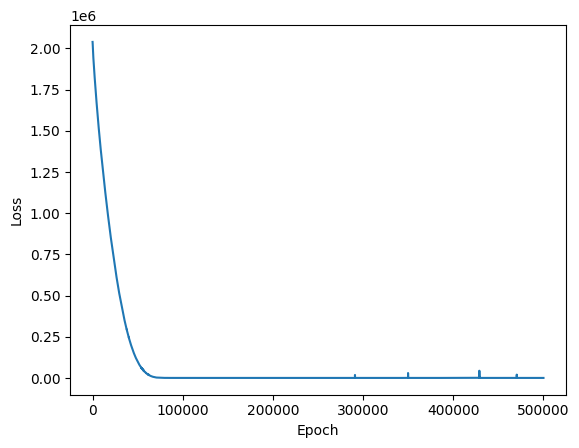

In [26]:
# Training loop
losses = []
for epoch in range(500000):
    optimizer.zero_grad()
    
    # Data loss
    data_pred = model(t_exp_tensor)
    data_loss = torch.mean((data_pred - data_exp_tensor)**2)
    
    # Physics loss
    p_loss = physics_loss(model, t_exp_tensor, mu_max_fit_tensor, Ks_fit_tensor, Y_fit_tensor, k_fit_tensor)
    
    # Total loss
    loss = data_loss + p_loss
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Plot the loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [27]:
# make preditions 
t_pred = np.linspace(t_exp.min(), t_exp.max(), 100)
t_pred_tensor = torch.tensor(t_pred, dtype=torch.float32).reshape(-1, 1)
t_pred_tensor

tensor([[ 0.0000],
        [ 0.5354],
        [ 1.0707],
        [ 1.6061],
        [ 2.1414],
        [ 2.6768],
        [ 3.2121],
        [ 3.7475],
        [ 4.2828],
        [ 4.8182],
        [ 5.3535],
        [ 5.8889],
        [ 6.4242],
        [ 6.9596],
        [ 7.4949],
        [ 8.0303],
        [ 8.5657],
        [ 9.1010],
        [ 9.6364],
        [10.1717],
        [10.7071],
        [11.2424],
        [11.7778],
        [12.3131],
        [12.8485],
        [13.3838],
        [13.9192],
        [14.4545],
        [14.9899],
        [15.5253],
        [16.0606],
        [16.5960],
        [17.1313],
        [17.6667],
        [18.2020],
        [18.7374],
        [19.2727],
        [19.8081],
        [20.3434],
        [20.8788],
        [21.4141],
        [21.9495],
        [22.4848],
        [23.0202],
        [23.5556],
        [24.0909],
        [24.6263],
        [25.1616],
        [25.6970],
        [26.2323],
        [26.7677],
        [27.3030],
        [27.

In [28]:
y_pred = model(t_pred_tensor).detach().numpy()
y_pred

array([[1.21312048e+03, 1.67744202e+02, 9.84859467e-03],
       [1.07852185e+03, 4.00224548e+02, 3.48790627e+01],
       [1.16990552e+03, 2.44414398e+02, 9.82844734e+00],
       [1.11510535e+03, 3.27737305e+02, 2.25365410e+01],
       [1.12758618e+03, 3.20456207e+02, 1.91071281e+01],
       [1.09977759e+03, 3.63633423e+02, 2.47813072e+01],
       [1.08927332e+03, 3.91078857e+02, 2.71792221e+01],
       [1.06538696e+03, 4.29287323e+02, 3.18320446e+01],
       [1.05286670e+03, 4.55962616e+02, 3.47193298e+01],
       [1.02595532e+03, 5.04087433e+02, 4.00093231e+01],
       [1.01553796e+03, 5.24092590e+02, 4.22349663e+01],
       [9.82454285e+02, 5.92965576e+02, 4.88656616e+01],
       [9.69307129e+02, 6.21570068e+02, 5.13344498e+01],
       [9.41495056e+02, 6.75814453e+02, 5.70231590e+01],
       [9.44591248e+02, 6.56318237e+02, 5.57355995e+01],
       [9.01247864e+02, 7.58347351e+02, 6.48471527e+01],
       [9.05915527e+02, 7.25750122e+02, 6.28669319e+01],
       [8.62320984e+02, 8.38177

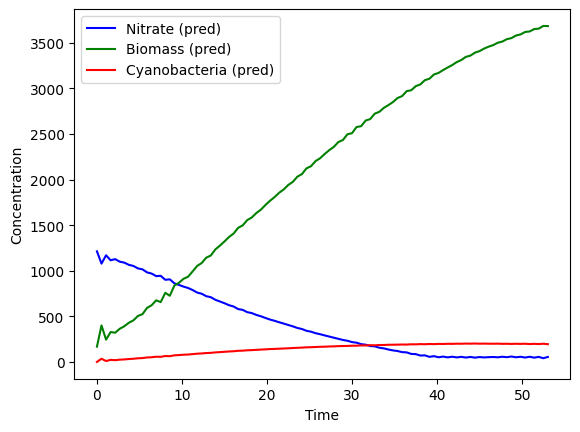

In [29]:
# Plot the results
plt.plot(t_pred, y_pred[:, 0], 'b-', label='Nitrate (pred)')
plt.plot(t_pred, y_pred[:, 1], 'g-', label='Biomass (pred)')
plt.plot(t_pred, y_pred[:, 2], 'r-', label='Cyanobacteria (pred)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.show()


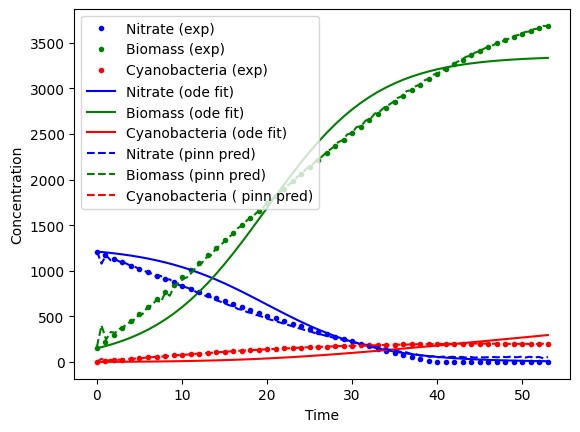

In [30]:
# plot the experimental data, the ode fit and the pinn fit
plt.plot(t_exp, data_exp[0::3], 'b.', label='Nitrate (exp)')
plt.plot(t_exp, data_exp[1::3], 'g.', label='Biomass (exp)')
plt.plot(t_exp, data_exp[2::3], 'r.', label='Cyanobacteria (exp)')
plt.plot(t_exp, y_fit[:, 0], 'b-', label='Nitrate (ode fit)')
plt.plot(t_exp, y_fit[:, 1], 'g-', label='Biomass (ode fit)')
plt.plot(t_exp, y_fit[:, 2], 'r-', label='Cyanobacteria (ode fit)')
plt.plot(t_pred, y_pred[:, 0], 'b--', label='Nitrate (pinn pred)')
plt.plot(t_pred, y_pred[:, 1], 'g--', label='Biomass (pinn pred)')
plt.plot(t_pred, y_pred[:, 2], 'r--', label='Cyanobacteria ( pinn pred)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.show()




### PINN with unknown (learnable) ODE Constants

In [87]:
# Define a simple feedforward neural network
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.fc1 = nn.Linear(1, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 3)

        # Define ODE parameters as trainable parameters
        self.mu_max = nn.Parameter(torch.tensor(1.0))
        self.K_s = nn.Parameter(torch.tensor(1.0))
        self.Y = nn.Parameter(torch.tensor(1.0))
        self.k = nn.Parameter(torch.tensor(1.0))

    def forward(self, t):
        x = torch.relu(self.fc1(t))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

In [88]:
# Function to compute physics loss
def physics_loss(model, t):
    y_pred = model(t)
    N_pred, X_pred, pc_pred = y_pred[:, 0], y_pred[:, 1], y_pred[:, 2]
    
    # Compute derivatives
    dNdt_pred = torch.autograd.grad(N_pred, t, grad_outputs=torch.ones_like(N_pred), create_graph=True)[0]
    dXdt_pred = torch.autograd.grad(X_pred, t, grad_outputs=torch.ones_like(X_pred), create_graph=True)[0]
    dpcdt_pred = torch.autograd.grad(pc_pred, t, grad_outputs=torch.ones_like(pc_pred), create_graph=True)[0]
    
    # Physics equations
    eq1 = dNdt_pred + (1/model.Y) * (model.mu_max * N_pred / (model.K_s + N_pred)) * X_pred
    eq2 = dXdt_pred - model.mu_max * N_pred / (model.K_s + N_pred) * X_pred
    eq3 = dpcdt_pred - model.k * X_pred
    
    return torch.mean(eq1**2) + torch.mean(eq2**2) + torch.mean(eq3**2)

In [89]:
# Initialize the model and optimizer
model = PINN()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Epoch 0, Loss: 913847.375
Epoch 1000, Loss: 100768.3125
Epoch 2000, Loss: 5463.30859375
Epoch 3000, Loss: 2003.055419921875
Epoch 4000, Loss: 1777.5228271484375
Epoch 5000, Loss: 1752.9215087890625
Epoch 6000, Loss: 1676.5638427734375
Epoch 7000, Loss: 1662.4111328125
Epoch 8000, Loss: 1658.0335693359375
Epoch 9000, Loss: 1659.9620361328125
Epoch 10000, Loss: 1656.43994140625
Epoch 11000, Loss: 1651.9918212890625
Epoch 12000, Loss: 1655.120361328125
Epoch 13000, Loss: 1629.1376953125
Epoch 14000, Loss: 1631.7491455078125
Epoch 15000, Loss: 1642.652587890625
Epoch 16000, Loss: 1631.146728515625
Epoch 17000, Loss: 1627.3211669921875
Epoch 18000, Loss: 1645.6722412109375
Epoch 19000, Loss: 1611.35888671875
Epoch 20000, Loss: 1599.8656005859375
Epoch 21000, Loss: 1611.3272705078125
Epoch 22000, Loss: 1638.61376953125
Epoch 23000, Loss: 1600.0587158203125
Epoch 24000, Loss: 1597.4693603515625
Epoch 25000, Loss: 1601.8831787109375
Epoch 26000, Loss: 1581.62890625
Epoch 27000, Loss: 1581.0006

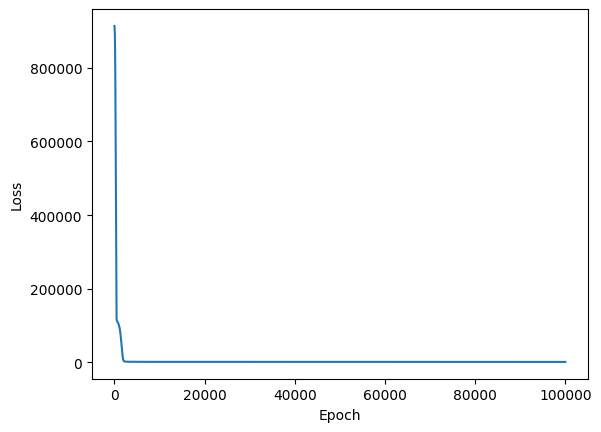

In [90]:
# Training loop
losses = []
for epoch in range(100000):
    optimizer.zero_grad()
    
    # Data loss
    data_pred = model(t_exp_tensor)
    data_loss = torch.mean((data_pred - data_exp_tensor)**2)
    
    # Physics loss
    p_loss = physics_loss(model, t_exp_tensor)
    
    # Total loss
    loss = data_loss + p_loss
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Plot the loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [92]:
t_pred = np.linspace(0, 53, 100)
t_pred

array([ 0.        ,  0.53535354,  1.07070707,  1.60606061,  2.14141414,
        2.67676768,  3.21212121,  3.74747475,  4.28282828,  4.81818182,
        5.35353535,  5.88888889,  6.42424242,  6.95959596,  7.49494949,
        8.03030303,  8.56565657,  9.1010101 ,  9.63636364, 10.17171717,
       10.70707071, 11.24242424, 11.77777778, 12.31313131, 12.84848485,
       13.38383838, 13.91919192, 14.45454545, 14.98989899, 15.52525253,
       16.06060606, 16.5959596 , 17.13131313, 17.66666667, 18.2020202 ,
       18.73737374, 19.27272727, 19.80808081, 20.34343434, 20.87878788,
       21.41414141, 21.94949495, 22.48484848, 23.02020202, 23.55555556,
       24.09090909, 24.62626263, 25.16161616, 25.6969697 , 26.23232323,
       26.76767677, 27.3030303 , 27.83838384, 28.37373737, 28.90909091,
       29.44444444, 29.97979798, 30.51515152, 31.05050505, 31.58585859,
       32.12121212, 32.65656566, 33.19191919, 33.72727273, 34.26262626,
       34.7979798 , 35.33333333, 35.86868687, 36.4040404 , 36.93

In [93]:
y_pred = model(torch.tensor(t_pred, dtype=torch.float32).reshape(-1, 1)).detach().numpy()
y_pred

array([[ 1.18243689e+03,  1.52493805e+02,  1.29194889e+01],
       [ 1.16456140e+03,  1.94768951e+02,  1.61821156e+01],
       [ 1.14668579e+03,  2.37044067e+02,  1.94447746e+01],
       [ 1.12881042e+03,  2.79319214e+02,  2.27073536e+01],
       [ 1.11093457e+03,  3.21594269e+02,  2.59699707e+01],
       [ 1.09305908e+03,  3.63869568e+02,  2.92325897e+01],
       [ 1.07518372e+03,  4.06144623e+02,  3.24952049e+01],
       [ 1.05730786e+03,  4.48419800e+02,  3.57578354e+01],
       [ 1.03943213e+03,  4.90695068e+02,  3.90204391e+01],
       [ 1.02155676e+03,  5.32970093e+02,  4.22830925e+01],
       [ 1.00368127e+03,  5.75245178e+02,  4.55457535e+01],
       [ 9.85805542e+02,  6.17520325e+02,  4.88083458e+01],
       [ 9.67929871e+02,  6.59795532e+02,  5.20709763e+01],
       [ 9.50054321e+02,  7.02070740e+02,  5.53336716e+01],
       [ 9.32178772e+02,  7.44345886e+02,  5.85962219e+01],
       [ 9.14303101e+02,  7.86621033e+02,  6.18587875e+01],
       [ 8.96427673e+02,  8.28896301e+02

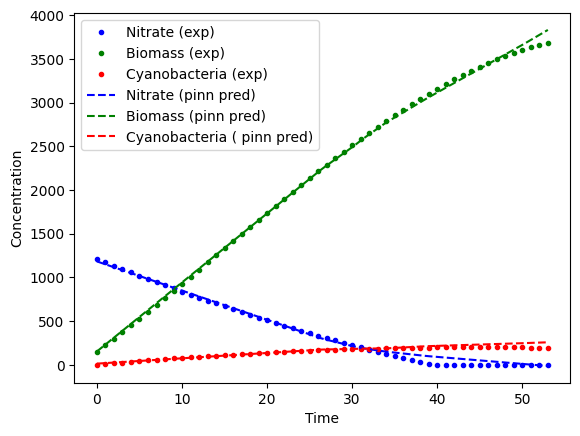

In [94]:
# plot the experimental data, the ode fit and the pinn fit
plt.plot(t_exp, data_exp[0::3], 'b.', label='Nitrate (exp)')
plt.plot(t_exp, data_exp[1::3], 'g.', label='Biomass (exp)')
plt.plot(t_exp, data_exp[2::3], 'r.', label='Cyanobacteria (exp)')
plt.plot(t_pred, y_pred[:, 0], 'b--', label='Nitrate (pinn pred)')
plt.plot(t_pred, y_pred[:, 1], 'g--', label='Biomass (pinn pred)')
plt.plot(t_pred, y_pred[:, 2], 'r--', label='Cyanobacteria ( pinn pred)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.show()


### Working with the batches 

#### Batch 1

In [124]:
batch01_experimental_results = pd.read_csv('Batch_1.csv')
batch01_experimental_results

,time,Biomass,Nitrate,pc
0,0.000000,240.530969,NaN,4.324240
1,0.917361,271.447278,1096.597856,4.779300
2,1.883333,318.752372,1160.423633,13.333333
3,4.830556,464.925403,1002.654289,22.496195
4,5.838194,516.453257,1080.242500,27.001522
5,6.835417,630.923953,1000.260822,35.159817
6,7.871528,705.561267,865.628322,48.401826
7,8.845139,772.903830,926.661722,48.219178
8,11.833333,998.271856,918.683500,72.754947
9,12.863889,1102.356640,859.445200,80.060883


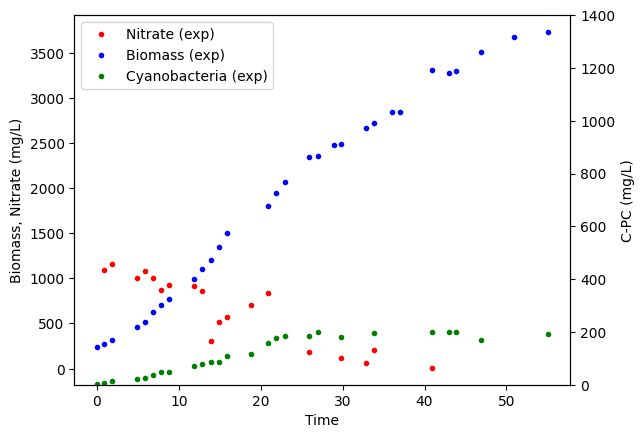

In [147]:
## plot the experimental data
# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot nitrate and biomass on the left y-axis
ax1.plot(batch01_experimental_results['time'], batch01_experimental_results['Nitrate'], 'r.', label='Nitrate (exp)')
ax1.plot(batch01_experimental_results['time'], batch01_experimental_results['Biomass'], 'b.', label='Biomass (exp)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Biomass, Nitrate (mg/L)')
ax1.tick_params(axis='y')

# Create another y-axis for the cyanobacteria (pc)
ax2 = ax1.twinx()
ax2.plot(batch01_experimental_results['time'], batch01_experimental_results['pc'], 'g.', label='Cyanobacteria (exp)')
ax2.set_ylabel('C-PC (mg/L)')
ax2.set_ylim(0, 1400)  # Set the y-axis range for Cyanobacteria (pc)
ax2.tick_params(axis='y')

# Combine legends from both y-axes, arranging experiments first
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

# Reorder legends so that experiments come first
lines = lines_1[0:2] + lines_2[0:1] + lines_1[2:] + lines_2[1:]
labels = labels_1[0:2] + labels_2[0:1] + labels_1[2:] + labels_2[1:]

ax1.legend(lines, labels, loc='upper left')

# Show the plot
plt.show()

In [126]:
# remove rows with missing values
batch01_experimental_results_cleaned = batch01_experimental_results.dropna()
batch01_experimental_results_cleaned

,time,Biomass,Nitrate,pc
1,0.917361,271.447278,1096.597856,4.779300
2,1.883333,318.752372,1160.423633,13.333333
3,4.830556,464.925403,1002.654289,22.496195
4,5.838194,516.453257,1080.242500,27.001522
5,6.835417,630.923953,1000.260822,35.159817
6,7.871528,705.561267,865.628322,48.401826
7,8.845139,772.903830,926.661722,48.219178
8,11.833333,998.271856,918.683500,72.754947
9,12.863889,1102.356640,859.445200,80.060883
10,13.885417,1208.958330,302.166378,84.322679


In [127]:
# use the first 15 data points for training
t_exp = np.array(batch01_experimental_results_cleaned['time'][0:15])
t_exp

array([ 0.91736111,  1.88333333,  4.83055556,  5.83819444,  6.83541667,
        7.87152778,  8.84513889, 11.83333333, 12.86388889, 13.88541667,
       14.85763889, 15.88333333, 20.8875    , 25.91944444, 29.83472222])

In [128]:
t_exp_tensor = torch.tensor(t_exp, dtype=torch.float32, requires_grad=True).reshape(-1, 1)
t_exp_tensor

tensor([[ 0.9174],
        [ 1.8833],
        [ 4.8306],
        [ 5.8382],
        [ 6.8354],
        [ 7.8715],
        [ 8.8451],
        [11.8333],
        [12.8639],
        [13.8854],
        [14.8576],
        [15.8833],
        [20.8875],
        [25.9194],
        [29.8347]], grad_fn=<ViewBackward0>)

In [129]:
data_exp = np.array(batch01_experimental_results_cleaned[['Nitrate', 'Biomass', 'pc']][0:15])
data_exp

array([[1096.597856  ,  271.4472785 ,    4.77929985],
       [1160.423633  ,  318.7523723 ,   13.33333333],
       [1002.654289  ,  464.9254025 ,   22.49619482],
       [1080.2425    ,  516.4532567 ,   27.00152207],
       [1000.260822  ,  630.9239533 ,   35.15981735],
       [ 865.6283222 ,  705.5612675 ,   48.40182648],
       [ 926.6617222 ,  772.9038303 ,   48.21917808],
       [ 918.6835    ,  998.2718564 ,   72.75494673],
       [ 859.4452    , 1102.35664   ,   80.0608828 ],
       [ 302.1663778 , 1208.95833   ,   84.32267884],
       [ 516.5811    , 1352.647089  ,   84.32267884],
       [ 577.2155889 , 1506.648244  ,  108.3713851 ],
       [ 836.7072667 , 1803.26141   ,  158.7062405 ],
       [ 188.5564933 , 2345.426348  ,  186.3622527 ],
       [ 112.6836    , 2486.933487  ,  179.1476408 ]])

In [130]:
data_exp_tensor = torch.tensor(data_exp, dtype=torch.float32).reshape(-1, 3)
data_exp_tensor

tensor([[1096.5979,  271.4473,    4.7793],
        [1160.4236,  318.7524,   13.3333],
        [1002.6543,  464.9254,   22.4962],
        [1080.2426,  516.4532,   27.0015],
        [1000.2608,  630.9240,   35.1598],
        [ 865.6283,  705.5613,   48.4018],
        [ 926.6617,  772.9038,   48.2192],
        [ 918.6835,  998.2719,   72.7549],
        [ 859.4452, 1102.3567,   80.0609],
        [ 302.1664, 1208.9584,   84.3227],
        [ 516.5811, 1352.6471,   84.3227],
        [ 577.2156, 1506.6482,  108.3714],
        [ 836.7073, 1803.2614,  158.7062],
        [ 188.5565, 2345.4263,  186.3623],
        [ 112.6836, 2486.9336,  179.1476]])

In [131]:
# Define a simple feedforward neural network
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.fc1 = nn.Linear(1, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 3)

        # Define ODE parameters as trainable parameters
        self.mu_max = nn.Parameter(torch.tensor(1.0))
        self.K_s = nn.Parameter(torch.tensor(1.0))
        self.Y = nn.Parameter(torch.tensor(1.0))
        self.k = nn.Parameter(torch.tensor(1.0))

    def forward(self, t):
        x = torch.relu(self.fc1(t))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

In [132]:
# Function to compute physics loss
def physics_loss(model, t):
    y_pred = model(t)
    N_pred, X_pred, pc_pred = y_pred[:, 0], y_pred[:, 1], y_pred[:, 2]
    
    # Compute derivatives
    dNdt_pred = torch.autograd.grad(N_pred, t, grad_outputs=torch.ones_like(N_pred), create_graph=True)[0]
    dXdt_pred = torch.autograd.grad(X_pred, t, grad_outputs=torch.ones_like(X_pred), create_graph=True)[0]
    dpcdt_pred = torch.autograd.grad(pc_pred, t, grad_outputs=torch.ones_like(pc_pred), create_graph=True)[0]
    
    # Physics equations
    eq1 = dNdt_pred + (1/model.Y) * (model.mu_max * N_pred / (model.K_s + N_pred)) * X_pred
    eq2 = dXdt_pred - model.mu_max * N_pred / (model.K_s + N_pred) * X_pred
    eq3 = dpcdt_pred - model.k * X_pred
    
    return torch.mean(eq1**2) + torch.mean(eq2**2) + torch.mean(eq3**2)

In [133]:
# Initialize the model and optimizer
model = PINN()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Epoch 0, Loss: 786074.25
Epoch 1000, Loss: 106225.8125
Epoch 2000, Loss: 12166.0029296875
Epoch 3000, Loss: 11840.3818359375
Epoch 4000, Loss: 11607.4892578125
Epoch 5000, Loss: 11391.5927734375
Epoch 6000, Loss: 11214.556640625
Epoch 7000, Loss: 11111.365234375
Epoch 8000, Loss: 11088.109375
Epoch 9000, Loss: 10992.8359375
Epoch 10000, Loss: 10796.7060546875
Epoch 11000, Loss: 10957.556640625
Epoch 12000, Loss: 10779.09765625
Epoch 13000, Loss: 10895.4755859375
Epoch 14000, Loss: 10883.25390625
Epoch 15000, Loss: 10871.8515625
Epoch 16000, Loss: 10857.15625
Epoch 17000, Loss: 10851.2783203125
Epoch 18000, Loss: 10844.591796875
Epoch 19000, Loss: 10642.041015625
Epoch 20000, Loss: 10826.2255859375
Epoch 21000, Loss: 10810.8466796875
Epoch 22000, Loss: 10800.380859375
Epoch 23000, Loss: 10783.6982421875
Epoch 24000, Loss: 10798.0654296875
Epoch 25000, Loss: 10791.177734375
Epoch 26000, Loss: 10758.169921875
Epoch 27000, Loss: 10558.4462890625
Epoch 28000, Loss: 10557.619140625
Epoch 290

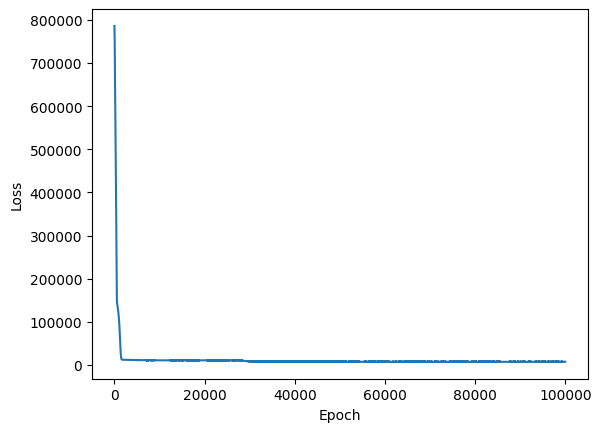

In [134]:
# Training loop
losses = []
for epoch in range(100000):
    optimizer.zero_grad()
    
    # Data loss
    data_pred = model(t_exp_tensor)
    data_loss = torch.mean((data_pred - data_exp_tensor)**2)
    
    # Physics loss
    p_loss = physics_loss(model, t_exp_tensor)
    
    # Total loss
    loss = data_loss + p_loss
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Plot the loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [135]:
t_pred = np.linspace(0, 56, 100)
t_pred

array([ 0.        ,  0.56565657,  1.13131313,  1.6969697 ,  2.26262626,
        2.82828283,  3.39393939,  3.95959596,  4.52525253,  5.09090909,
        5.65656566,  6.22222222,  6.78787879,  7.35353535,  7.91919192,
        8.48484848,  9.05050505,  9.61616162, 10.18181818, 10.74747475,
       11.31313131, 11.87878788, 12.44444444, 13.01010101, 13.57575758,
       14.14141414, 14.70707071, 15.27272727, 15.83838384, 16.4040404 ,
       16.96969697, 17.53535354, 18.1010101 , 18.66666667, 19.23232323,
       19.7979798 , 20.36363636, 20.92929293, 21.49494949, 22.06060606,
       22.62626263, 23.19191919, 23.75757576, 24.32323232, 24.88888889,
       25.45454545, 26.02020202, 26.58585859, 27.15151515, 27.71717172,
       28.28282828, 28.84848485, 29.41414141, 29.97979798, 30.54545455,
       31.11111111, 31.67676768, 32.24242424, 32.80808081, 33.37373737,
       33.93939394, 34.50505051, 35.07070707, 35.63636364, 36.2020202 ,
       36.76767677, 37.33333333, 37.8989899 , 38.46464646, 39.03

In [136]:
y_pred = model(torch.tensor(t_pred, dtype=torch.float32).reshape(-1, 1)).detach().numpy()
y_pred

array([[ 1.15580762e+03,  2.36927658e+02,  3.17797136e+00],
       [ 1.14670801e+03,  2.58718170e+02,  5.28962803e+00],
       [ 1.13488293e+03,  2.91916199e+02,  8.57483387e+00],
       [ 1.12331116e+03,  3.28047211e+02,  1.18260031e+01],
       [ 1.10918872e+03,  3.58968292e+02,  1.44765720e+01],
       [ 1.09324524e+03,  3.86334259e+02,  1.66797981e+01],
       [ 1.07730225e+03,  4.13700165e+02,  1.88830490e+01],
       [ 1.06135913e+03,  4.41066101e+02,  2.10862808e+01],
       [ 1.04417297e+03,  4.69644684e+02,  2.33942280e+01],
       [ 1.02814978e+03,  5.04335236e+02,  2.61097832e+01],
       [ 1.01741479e+03,  5.42257812e+02,  2.89654713e+01],
       [ 1.00142560e+03,  5.83934998e+02,  3.26725082e+01],
       [ 9.83011230e+02,  6.27338501e+02,  3.67751312e+01],
       [ 9.64597107e+02,  6.70741516e+02,  4.08777122e+01],
       [ 9.46182983e+02,  7.14144775e+02,  4.49802856e+01],
       [ 9.27768738e+02,  7.57547974e+02,  4.90828896e+01],
       [ 9.09354431e+02,  8.00951233e+02

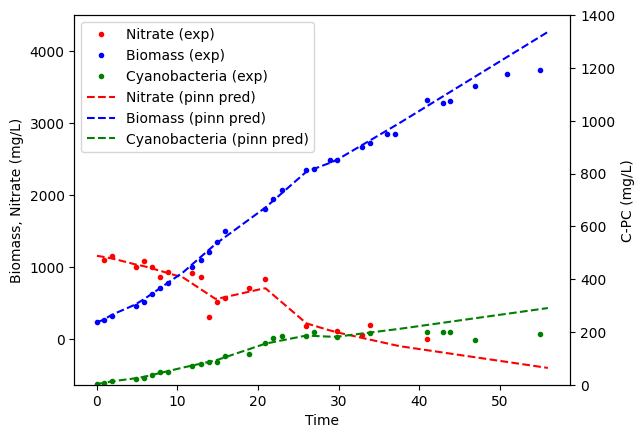

In [145]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot nitrate and biomass on the left y-axis
ax1.plot(batch01_experimental_results['time'], batch01_experimental_results['Nitrate'], 'r.', label='Nitrate (exp)')
ax1.plot(batch01_experimental_results['time'], batch01_experimental_results['Biomass'], 'b.', label='Biomass (exp)')
ax1.plot(t_pred, y_pred[:, 0], 'r--', label='Nitrate (pinn pred)')
ax1.plot(t_pred, y_pred[:, 1], 'b--', label='Biomass (pinn pred)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Biomass, Nitrate (mg/L)')
ax1.tick_params(axis='y')

# Create another y-axis for the cyanobacteria (pc)
ax2 = ax1.twinx()
ax2.plot(batch01_experimental_results['time'], batch01_experimental_results['pc'], 'g.', label='Cyanobacteria (exp)')
ax2.plot(t_pred, y_pred[:, 2], 'g--', label='Cyanobacteria (pinn pred)')
ax2.set_ylabel('C-PC (mg/L)')
ax2.set_ylim(0, 800)  # Set the y-axis range for Cyanobacteria (pc)
ax2.tick_params(axis='y')

# Combine legends from both y-axes, arranging experiments first
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

# Reorder legends so that experiments come first
lines = lines_1[0:2] + lines_2[0:1] + lines_1[2:] + lines_2[1:]
labels = labels_1[0:2] + labels_2[0:1] + labels_1[2:] + labels_2[1:]

ax1.legend(lines, labels, loc='upper left')

# Show the plot
plt.show()


#### Batch 2

##### In batch two, I will try something a little bit different (called adaptive loss weighing), <br> I will add some parameters to weigh the loss contributions 

In [2]:
batch02_experimental_results = pd.read_csv('Batch_2.csv')
batch02_experimental_results

,time,Biomass,Nitrate,pc
0,1,153.39213,208.25,1.57
1,2,227.84562,253.69,2.74
2,3,276.28524,203.32,5.48
3,4,345.35655,161.97,8.23
4,7,524.76255,49.49,12.66
5,8,601.90713,3.10,16.15
6,9,622.53882,0.44,16.35
7,10,693.40419,1.20,15.78
8,11,775.03392,0.00,17.86
9,14,897.92703,0.00,19.00


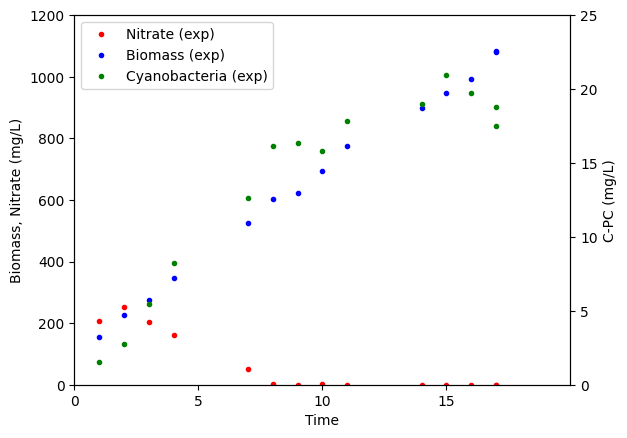

In [3]:
## plot the experimental data
# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot nitrate and biomass on the left y-axis
ax1.plot(batch02_experimental_results['time'], batch02_experimental_results['Nitrate'], 'r.', label='Nitrate (exp)')
ax1.plot(batch02_experimental_results['time'], batch02_experimental_results['Biomass'], 'b.', label='Biomass (exp)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Biomass, Nitrate (mg/L)')
ax1.set_ylim(0, 1200)  # Set the y-axis range for Nitrate and Biomass
# set the x-axis range and step size
ax1.set_xlim(0, 20)
ax1.set_xticks(np.arange(0, 20, 5))
ax1.tick_params(axis='y')

# Create another y-axis for the cyanobacteria (pc)
ax2 = ax1.twinx()
ax2.plot(batch02_experimental_results['time'], batch02_experimental_results['pc'], 'g.', label='Cyanobacteria (exp)')
ax2.set_ylabel('C-PC (mg/L)')
ax2.set_ylim(0, 25)  # Set the y-axis range for Cyanobacteria (pc)
ax2.tick_params(axis='y')

# Combine legends from both y-axes, arranging experiments first
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

# Reorder legends so that experiments come first
lines = lines_1[0:2] + lines_2[0:1] + lines_1[2:] + lines_2[1:]
labels = labels_1[0:2] + labels_2[0:1] + labels_1[2:] + labels_2[1:]

ax1.legend(lines, labels, loc='upper left')

# Show the plot
plt.show()

In [4]:
# use the first 10 data points for training
t_exp = np.array(batch02_experimental_results['time'][0:10])
t_exp

array([ 1,  2,  3,  4,  7,  8,  9, 10, 11, 14], dtype=int64)

In [5]:
t_exp_tensor = torch.tensor(t_exp, dtype=torch.float32, requires_grad=True).reshape(-1, 1)
t_exp_tensor

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [14.]], grad_fn=<ViewBackward0>)

In [6]:
data_exp = np.array(batch02_experimental_results[['Nitrate', 'Biomass', 'pc']][0:10])
data_exp

array([[2.0825000e+02, 1.5339213e+02, 1.5700000e+00],
       [2.5369000e+02, 2.2784562e+02, 2.7400000e+00],
       [2.0332000e+02, 2.7628524e+02, 5.4800000e+00],
       [1.6197000e+02, 3.4535655e+02, 8.2300000e+00],
       [4.9490000e+01, 5.2476255e+02, 1.2660000e+01],
       [3.1000000e+00, 6.0190713e+02, 1.6150000e+01],
       [4.4000000e-01, 6.2253882e+02, 1.6350000e+01],
       [1.2000000e+00, 6.9340419e+02, 1.5780000e+01],
       [0.0000000e+00, 7.7503392e+02, 1.7860000e+01],
       [0.0000000e+00, 8.9792703e+02, 1.9000000e+01]])

In [7]:
data_exp_tensor = torch.tensor(data_exp, dtype=torch.float32).reshape(-1, 3)
data_exp_tensor

tensor([[2.0825e+02, 1.5339e+02, 1.5700e+00],
        [2.5369e+02, 2.2785e+02, 2.7400e+00],
        [2.0332e+02, 2.7629e+02, 5.4800e+00],
        [1.6197e+02, 3.4536e+02, 8.2300e+00],
        [4.9490e+01, 5.2476e+02, 1.2660e+01],
        [3.1000e+00, 6.0191e+02, 1.6150e+01],
        [4.4000e-01, 6.2254e+02, 1.6350e+01],
        [1.2000e+00, 6.9340e+02, 1.5780e+01],
        [0.0000e+00, 7.7503e+02, 1.7860e+01],
        [0.0000e+00, 8.9793e+02, 1.9000e+01]])

In [8]:
# Define a simple feedforward neural network
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.fc1 = nn.Linear(1, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 3)

        # Define ODE parameters as trainable parameters
        self.mu_max = nn.Parameter(torch.tensor(1.0))
        self.K_s = nn.Parameter(torch.tensor(1.0))
        self.Y = nn.Parameter(torch.tensor(1.0))
        self.k = nn.Parameter(torch.tensor(1.0))

        # Define trainable lambda parameters for adaptive loss
        # self.lambda_1 = nn.Parameter(torch.tensor(1.0))  # Weight for data loss
        # self.lambda_2 = nn.Parameter(torch.tensor(1.0))  # Weight for physics loss

    def forward(self, t):
        x = torch.relu(self.fc1(t))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

In [9]:
# Function to compute physics loss
def physics_loss(model, t):
    y_pred = model(t)
    N_pred, X_pred, pc_pred = y_pred[:, 0], y_pred[:, 1], y_pred[:, 2]
    
    # Compute derivatives
    dNdt_pred = torch.autograd.grad(N_pred, t, grad_outputs=torch.ones_like(N_pred), create_graph=True)[0]
    dXdt_pred = torch.autograd.grad(X_pred, t, grad_outputs=torch.ones_like(X_pred), create_graph=True)[0]
    dpcdt_pred = torch.autograd.grad(pc_pred, t, grad_outputs=torch.ones_like(pc_pred), create_graph=True)[0]
    
    # Physics equations
    eq1 = dNdt_pred + (1/model.Y) * (model.mu_max * N_pred / (model.K_s + N_pred)) * X_pred
    eq2 = dXdt_pred - model.mu_max * N_pred / (model.K_s + N_pred) * X_pred
    eq3 = dpcdt_pred - model.k * X_pred
    
    return torch.mean(eq1**2) + torch.mean(eq2**2) + torch.mean(eq3**2)

In [10]:
# Initialize the model and optimizer
model = PINN()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Epoch 0, Loss: 112000.640625
Epoch 1000, Loss: 6650.59033203125
Epoch 2000, Loss: 3675.4599609375
Epoch 3000, Loss: 940.010009765625
Epoch 4000, Loss: 810.6815795898438
Epoch 5000, Loss: 761.6070556640625
Epoch 6000, Loss: 738.9024047851562
Epoch 7000, Loss: 758.524169921875
Epoch 8000, Loss: 714.8104248046875
Epoch 9000, Loss: 712.289794921875
Epoch 10000, Loss: 707.1463623046875
Epoch 11000, Loss: 742.844482421875
Epoch 12000, Loss: 776.4017333984375
Epoch 13000, Loss: 706.6258544921875
Epoch 14000, Loss: 692.410400390625
Epoch 15000, Loss: 682.3322143554688
Epoch 16000, Loss: 676.385986328125
Epoch 17000, Loss: 602.6220092773438
Epoch 18000, Loss: 590.66552734375
Epoch 19000, Loss: 581.96875
Epoch 20000, Loss: 612.2348022460938
Epoch 21000, Loss: 574.289306640625
Epoch 22000, Loss: 568.0562133789062
Epoch 23000, Loss: 560.1602783203125
Epoch 24000, Loss: 552.7359619140625
Epoch 25000, Loss: 553.2030639648438
Epoch 26000, Loss: 543.8570556640625
Epoch 27000, Loss: 542.6282958984375
E

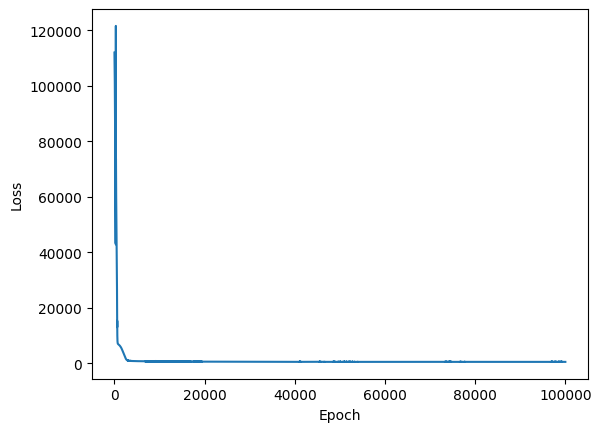

In [11]:
# Training loop
losses = []
for epoch in range(100000):
    optimizer.zero_grad()
    
    # Data loss
    data_pred = model(t_exp_tensor)
    data_loss = torch.mean((data_pred - data_exp_tensor)**2)
    
    # Physics loss
    p_loss = physics_loss(model, t_exp_tensor)
    
    # Total loss with adaptive weights
    # loss = model.lambda_1 * data_loss + model.lambda_2 * p_loss
    loss = data_loss + p_loss
    
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Plot the loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [12]:
t_pred = np.linspace(0, 18, 20)
t_pred

array([ 0.        ,  0.94736842,  1.89473684,  2.84210526,  3.78947368,
        4.73684211,  5.68421053,  6.63157895,  7.57894737,  8.52631579,
        9.47368421, 10.42105263, 11.36842105, 12.31578947, 13.26315789,
       14.21052632, 15.15789474, 16.10526316, 17.05263158, 18.        ])

In [13]:
y_pred = model(torch.tensor(t_pred, dtype=torch.float32).reshape(-1, 1)).detach().numpy()
y_pred

array([[ 2.23884766e+02,  1.27384605e+02, -7.83337355e-01],
       [ 2.27223511e+02,  1.67953781e+02,  2.34972286e+00],
       [ 2.17801224e+02,  2.20632004e+02,  3.56736636e+00],
       [ 1.89936050e+02,  2.76615173e+02,  5.24051857e+00],
       [ 1.59743423e+02,  3.33023254e+02,  6.97264767e+00],
       [ 1.29550903e+02,  3.89431274e+02,  8.70476437e+00],
       [ 9.93583145e+01,  4.45839264e+02,  1.04368868e+01],
       [ 6.91657486e+01,  5.02247314e+02,  1.21690063e+01],
       [ 3.89731522e+01,  5.58655334e+02,  1.39011250e+01],
       [ 2.42725964e+01,  6.12488220e+02,  1.51199970e+01],
       [ 2.22887020e+01,  6.64207397e+02,  1.59175320e+01],
       [ 2.03048058e+01,  7.15926575e+02,  1.67150841e+01],
       [ 1.83209229e+01,  7.67645691e+02,  1.75126381e+01],
       [ 1.63370323e+01,  8.19364746e+02,  1.83101788e+01],
       [ 1.43531418e+01,  8.71083984e+02,  1.91077366e+01],
       [ 1.23692446e+01,  9.22803162e+02,  1.99052773e+01],
       [ 1.03853598e+01,  9.74522156e+02

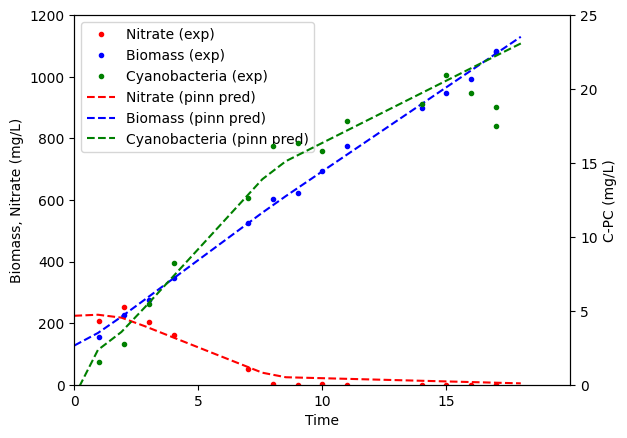

In [14]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot nitrate and biomass on the left
ax1.plot(batch02_experimental_results['time'], batch02_experimental_results['Nitrate'], 'r.', label='Nitrate (exp)')
ax1.plot(batch02_experimental_results['time'], batch02_experimental_results['Biomass'], 'b.', label='Biomass (exp)')
ax1.plot(t_pred, y_pred[:, 0], 'r--', label='Nitrate (pinn pred)')
ax1.plot(t_pred, y_pred[:, 1], 'b--', label='Biomass (pinn pred)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Biomass, Nitrate (mg/L)')
ax1.set_ylim(0, 1200)  # Set the y-axis range for Nitrate and Biomass
# set the x-axis range and step size
ax1.set_xlim(0, 20)
ax1.set_xticks(np.arange(0, 20, 5))
ax1.tick_params(axis='y')

# Create another y-axis for the cyanobacteria (pc)
ax2 = ax1.twinx()
ax2.plot(batch02_experimental_results['time'], batch02_experimental_results['pc'], 'g.', label='Cyanobacteria (exp)')
ax2.plot(t_pred, y_pred[:, 2], 'g--', label='Cyanobacteria (pinn pred)')
ax2.set_ylabel('C-PC (mg/L)')
ax2.set_ylim(0, 25)  # Set the y-axis range for Cyanobacteria (pc)

# Combine legends from both y-axes, arranging experiments first
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

# Reorder legends so that experiments come first
lines = lines_1[0:2] + lines_2[0:1] + lines_1[2:] + lines_2[1:]
labels = labels_1[0:2] + labels_2[0:1] + labels_1[2:] + labels_2[1:]

ax1.legend(lines, labels, loc='upper left')

# Show the plot
plt.show()